=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Summary Statistics ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6991

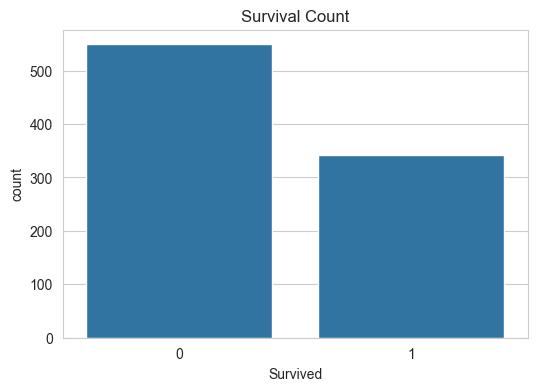

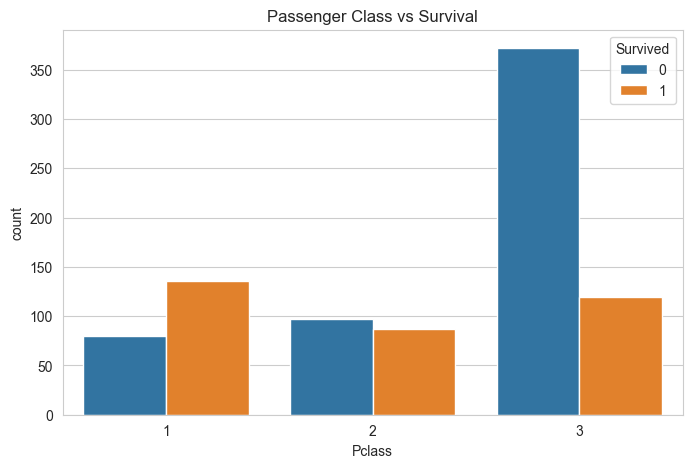

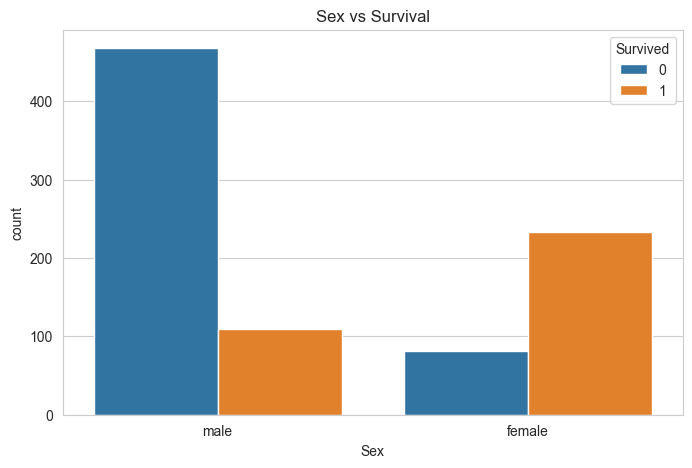

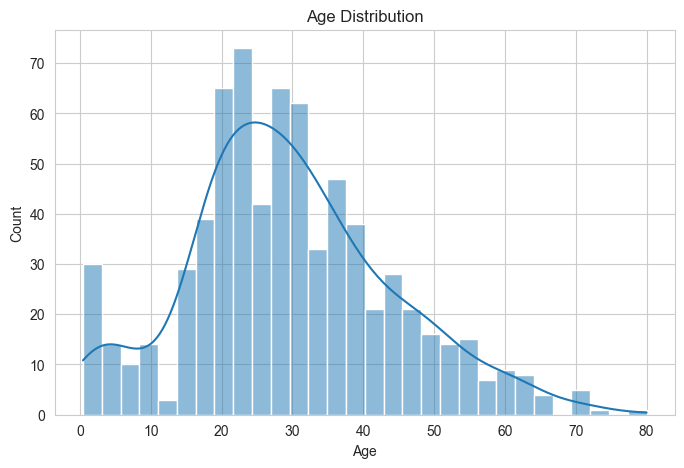

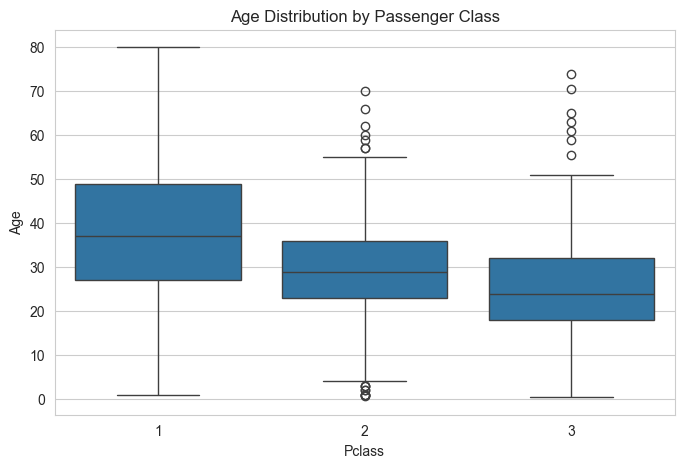

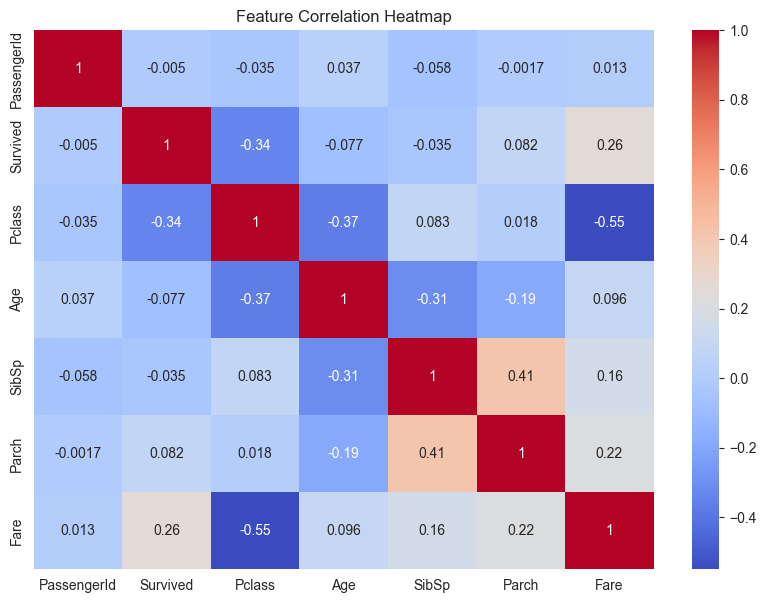

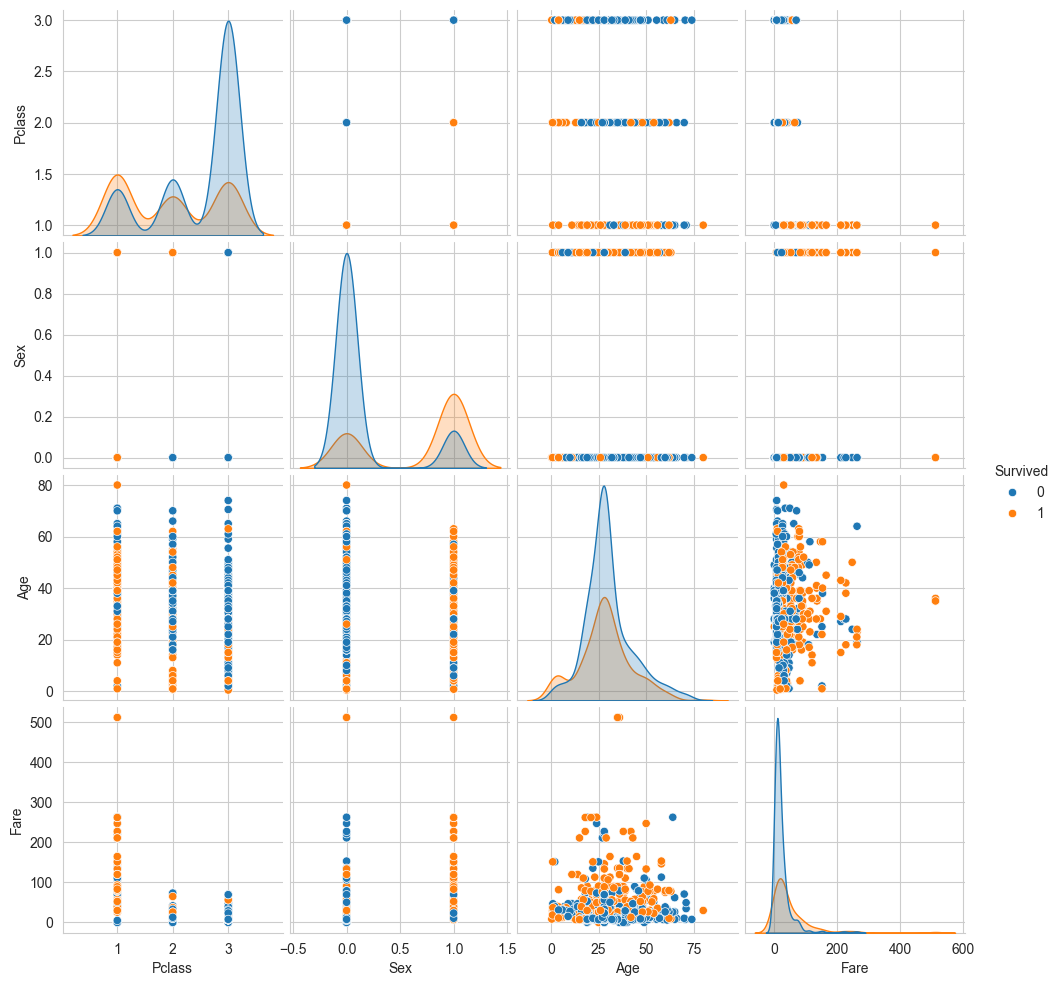


Key Insights:
- Survival rates were much higher for females.
- 1st class passengers had a better chance of survival.
- Age and Fare show some patterns linked to survival.
- Some missing data in 'Age' and major missingness in 'Cabin'.

Next steps:
- Handling missing data (Age, Cabin).
- Feature engineering (Family size, Title extraction from Name).



In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')

# Display basic info
print("=== Basic Info ===")
print(train_df.info())
print("\n=== Summary Statistics ===")
print(train_df.describe())

# Check missing values
print("\n=== Missing Values ===")
print(train_df.isnull().sum())

# Value counts for key categorical variables
print("\n=== Value Counts ===")
print(train_df['Survived'].value_counts())
print(train_df['Pclass'].value_counts())
print(train_df['Sex'].value_counts())
print(train_df['Embarked'].value_counts())

# Visualizations
sns.set_style('whitegrid')

# 1. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# 2. Passenger Class vs Survival
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival')
plt.show()

# 3. Sex vs Survival
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Sex vs Survival')
plt.show()

# 4. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 5. Boxplot: Age vs Pclass
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

# 6. Correlation Heatmap
# Only use numeric columns
numeric_cols = train_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,7))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 7. Pairplot for Selected Features
# Prepare data: encode 'Sex' and handle missing 'Age'
pairplot_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
pairplot_df['Sex'] = pairplot_df['Sex'].map({'male': 0, 'female': 1})
pairplot_df['Age'] = pairplot_df['Age'].fillna(pairplot_df['Age'].median())

sns.pairplot(pairplot_df, hue='Survived')
plt.show()


# Summary of Findings
summary = """
Key Insights:
- Survival rates were much higher for females.
- 1st class passengers had a better chance of survival.
- Age and Fare show some patterns linked to survival.
- Some missing data in 'Age' and major missingness in 'Cabin'.

Next steps:
- Handling missing data (Age, Cabin).
- Feature engineering (Family size, Title extraction from Name).
"""
print(summary)
